1. Data Integrity



In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('C:/Users/shuvish/Desktop/airbnb.xlsx')
print(df)

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [40]:
# Check the data types of each column
df.dtypes


id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [41]:
# Check for unique values in a categorical column
df['neighbourhood_group'].unique()


array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [42]:
# Check for negative values in the 'price' column
df[df['price'] < 0]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


2. Missing Data Handling

In [43]:
# Check for missing values
df.isnull().sum()


id                                    0
name                                 24
host_id                               0
host_name                            22
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#handling missing values
df.dropna(subset=['name'], inplace=True)
df.dropna(subset=['host_name'], inplace=True)
print(df)


             id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group 

3. Duplicate Removal

In [50]:
# Check for duplicate rows
df.duplicated().sum()


0

4. Standardization

In [52]:
# Convert all neighborhood group names to lowercase
df['neighbourhood_group'] = df['neighbourhood_group'].str.lower()

# Strip extra spaces in string columns
df['name'] = df['name'].str.strip()
print(df)


             id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group 

In [56]:
# Remove '$' and ',' from price column and convert to float
df['price'] = df['price'].replace({'$': '', ',': ''}, regex=True).astype(float)
print(df)

             id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group 

In [57]:
# Convert 'last_review' to datetime format
df['last_review'] = pd.to_datetime(df['last_review'])
print(df)


             id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group 

5. Outlier Detection

In [59]:
# Calculate IQR for 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


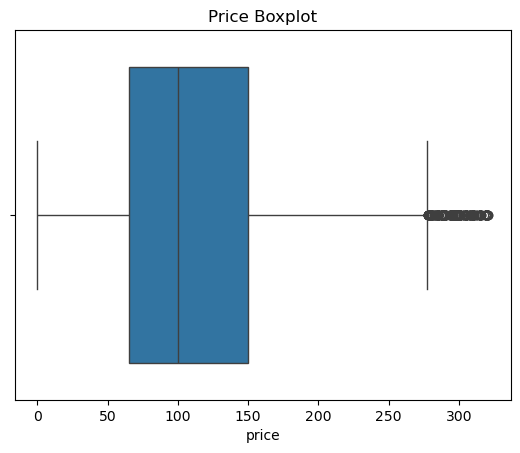

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a boxplot for the 'price' column
sns.boxplot(x=df['price'])
plt.title('Price Boxplot')
plt.show()
